In [1]:
# !pip install tensorflow==2.15.0

In [1]:
import matplotlib.pylab as pylab
from sklearn.metrics import mean_squared_log_error, mean_absolute_error, mean_squared_error, r2_score
from tensorflow.keras import backend as K
from tensorflow.keras.layers import *
from tensorflow.keras.models import *
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
import os
import random
import tqdm
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

import warnings
warnings.filterwarnings("ignore")

Mounted at /content/drive


In [2]:
print(tf.__version__)

2.15.0


In [3]:
## tensorflow 2 ###

# Grid search
# import talos

df = pd.read_csv('/content/drive/MyDrive/capstone/data/decompose_by_interest_4.csv')

# df = pd.read_csv('/content/drive/My Drive/decompose_by_attention_per_day.csv')
# df_at = pd.read_csv('/content/drive/My Drive/decompose_by_attention.csv')
# df_ca = pd.read_csv('/content/drive/My Drive/decompose_by_caution.csv')
# df_se = pd.read_csv('/content/drive/My Drive/decompose_by_serious.csv')

numeric_cols = df.select_dtypes(include='number').columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())

print(df.shape)
df

(1471716, 38)


,datetime,fw,wl,wlobscd,ymdhm,observatory,interest,attention,caution,serious,...,paldang_4hour,paldang_6hour,paldang_8hour,paldang_10hour,paldang_12hour,rf_kangwon_4hour,rf_kangwon_6hour,rf_kangwon_8hour,rf_kangwon_10hour,rf_kangwon_12hour
0,2010-01-01 00:00:00,6.08,1.78,1018655,2010010100,Daegok Bridge,3.8,5.5,7.0,8.5,...,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0
1,2010-01-01 01:00:00,6.08,1.78,1018655,2010010101,Daegok Bridge,3.8,5.5,7.0,8.5,...,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0
2,2010-01-01 02:00:00,6.08,1.78,1018655,2010010102,Daegok Bridge,3.8,5.5,7.0,8.5,...,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0
3,2010-01-01 03:00:00,6.08,1.78,1018655,2010010103,Daegok Bridge,3.8,5.5,7.0,8.5,...,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0
4,2010-01-01 04:00:00,6.08,1.78,1018655,2010010104,Daegok Bridge,3.8,5.5,7.0,8.5,...,0.000,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1471711,2023-12-31 19:00:00,128.90,1.13,1018640,2023123119,Gwangjin Bridge,3.0,8.0,10.5,13.6,...,0.200,11.507,130.316,129.862,0.200,0.0,0.0,0.0,0.8,0.0
1471712,2023-12-31 20:00:00,124.87,1.13,1018640,2023123120,Gwangjin Bridge,3.0,8.0,10.5,13.6,...,127.950,0.200,118.564,139.239,1.120,0.0,0.0,2.7,0.0,0.0
1471713,2023-12-31 21:00:00,124.87,1.13,1018640,2023123121,Gwangjin Bridge,3.0,8.0,10.5,13.6,...,142.493,0.200,11.507,130.316,129.862,0.0,0.0,0.0,0.0,0.8
1471714,2023-12-31 22:00:00,128.90,1.13,1018640,2023123122,Gwangjin Bridge,3.0,8.0,10.5,13.6,...,143.902,127.950,0.200,118.564,139.239,0.0,0.0,0.0,2.7,0.0


In [4]:
warning_level = df[['observatory','interest','attention','caution','serious']]
warning_level = warning_level.drop_duplicates().reset_index(drop=True)
df.drop(['interest','attention','caution','serious'], axis=1, inplace=True)
warning_level

,observatory,interest,attention,caution,serious
0,Daegok Bridge,3.8,5.5,7.0,8.5
1,Ogeum Bridge,4.0,7.0,9.0,11.1
2,Neobu Bridge,1.5,3.0,4.0,4.8
3,Haengju Bridge,4.5,6.5,8.0,10.7
4,Daechi Bridge,3.0,8.5,11.0,13.5
5,Jamsu Bridge,3.9,5.5,6.2,6.5
6,Hangang Bridge,3.9,8.5,10.5,13.3
7,Wolgye 2 Bridge,2.0,5.0,6.0,6.2
8,Changdong Bridge,4.5,5.5,6.5,7.9
9,Cheongdam Bridge,3.0,9.0,11.5,16.0


In [5]:
df.columns

Index(['datetime', 'fw', 'wl', 'wlobscd', 'ymdhm', 'observatory', 'latitude',
       'longitude', 'date', 'year', 'month', 'day', 'hour', 'warning level',
       'trend', 'seasonal', 'anomalies', 'residual', 'rf_seoul',
       'chungju_4hour', 'chungju_6hour', 'chungju_8hour', 'chungju_10hour',
       'chungju_12hour', 'paldang_4hour', 'paldang_6hour', 'paldang_8hour',
       'paldang_10hour', 'paldang_12hour', 'rf_kangwon_4hour',
       'rf_kangwon_6hour', 'rf_kangwon_8hour', 'rf_kangwon_10hour',
       'rf_kangwon_12hour'],
      dtype='object')

In [6]:
from sklearn.preprocessing import StandardScaler

# StandardScaler를 사용하여 데이터 정규화

col = ['wl', 'fw', 'residual','seasonal','trend',
       'rf_seoul','chungju_4hour', 'chungju_6hour', 'chungju_8hour', 'chungju_10hour',
       'chungju_12hour', 'paldang_4hour', 'paldang_6hour', 'paldang_8hour',
       'paldang_10hour', 'paldang_12hour', 'rf_kangwon_4hour',
       'rf_kangwon_6hour', 'rf_kangwon_8hour', 'rf_kangwon_10hour',
       'rf_kangwon_12hour']

scaler = StandardScaler()
scaler.fit(df[col])

# 원래 데이터의 평균과 표준편차 저장
mean_values = scaler.mean_
std_values = scaler.scale_

# 데이터 정규화
df[col] = scaler.transform(df[col])
df=df[df['observatory']=='Cheongdam Bridge']
df

,datetime,fw,wl,wlobscd,ymdhm,observatory,latitude,longitude,date,year,...,paldang_4hour,paldang_6hour,paldang_8hour,paldang_10hour,paldang_12hour,rf_kangwon_4hour,rf_kangwon_6hour,rf_kangwon_8hour,rf_kangwon_10hour,rf_kangwon_12hour
1103787,2010-01-01 00:00:00,0.185755,-0.030786,1018662,2010010100,Cheongdam Bridge,37.526074,127.064246,2010-01-01,2010,...,-0.247182,-0.247160,-0.247133,-0.247117,-0.247108,-0.126371,-0.126372,-0.126372,-0.126372,-0.126356
1103788,2010-01-01 01:00:00,0.167915,-0.053269,1018662,2010010101,Cheongdam Bridge,37.526074,127.064246,2010-01-01,2010,...,-0.247182,-0.247160,-0.247133,-0.247117,-0.247108,-0.126371,-0.126372,-0.126372,-0.126372,-0.126356
1103789,2010-01-01 02:00:00,0.132222,-0.098235,1018662,2010010102,Cheongdam Bridge,37.526074,127.064246,2010-01-01,2010,...,-0.247182,-0.247160,-0.247133,-0.247117,-0.247108,-0.126371,-0.126372,-0.126372,-0.126372,-0.126356
1103790,2010-01-01 03:00:00,0.117310,-0.120718,1018662,2010010103,Cheongdam Bridge,37.526074,127.064246,2010-01-01,2010,...,-0.247182,-0.247160,-0.247133,-0.247117,-0.247108,-0.126371,-0.126372,-0.126372,-0.126372,-0.126356
1103791,2010-01-01 04:00:00,0.080001,-0.176925,1018662,2010010104,Cheongdam Bridge,37.526074,127.064246,2010-01-01,2010,...,-0.247182,-0.247160,-0.247133,-0.247117,-0.247108,-0.126371,-0.126372,-0.126372,-0.126372,-0.126356
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1226425,2023-12-31 19:00:00,0.031939,-0.244374,1018662,2023123119,Cheongdam Bridge,37.526074,127.064246,2023-12-31,2023,...,-0.246257,-0.193951,0.355455,0.353375,-0.246183,-0.126371,-0.126372,-0.126372,0.536710,-0.126356
1226426,2023-12-31 20:00:00,0.031939,-0.244374,1018662,2023123120,Cheongdam Bridge,37.526074,127.064246,2023-12-31,2023,...,0.344460,-0.246235,0.301113,0.396735,-0.241929,-0.126371,-0.126372,2.111529,-0.126372,-0.126356
1226427,2023-12-31 21:00:00,0.017609,-0.266857,1018662,2023123121,Cheongdam Bridge,37.526074,127.064246,2023-12-31,2023,...,0.411707,-0.246235,-0.193924,0.355474,0.353384,-0.126371,-0.126372,-0.126372,-0.126372,0.536738
1226428,2023-12-31 22:00:00,0.017609,-0.266857,1018662,2023123122,Cheongdam Bridge,37.526074,127.064246,2023-12-31,2023,...,0.418222,0.344484,-0.246208,0.301132,0.396744,-0.126371,-0.126372,-0.126372,2.111529,-0.126356


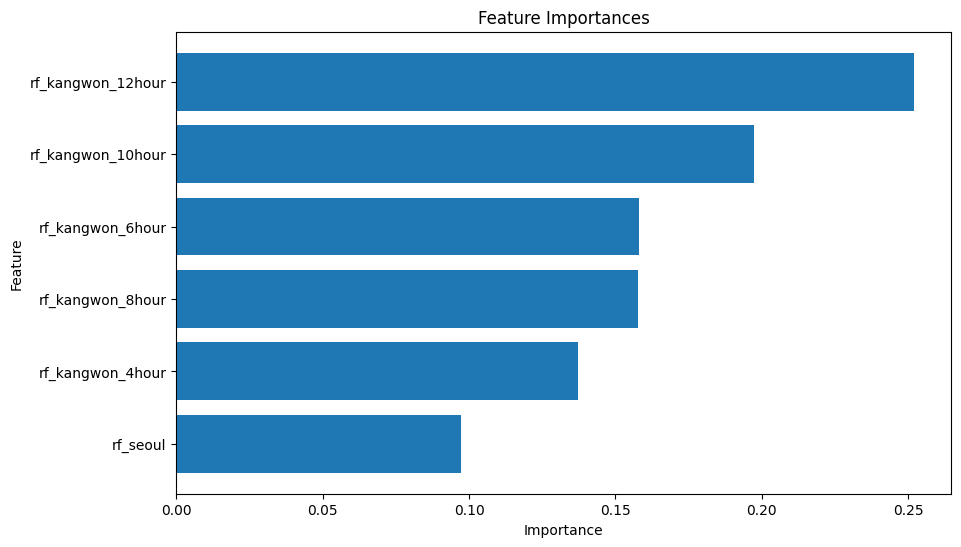

             feature  importance
5  rf_kangwon_12hour    0.252030
4  rf_kangwon_10hour    0.197450
2   rf_kangwon_6hour    0.158061
3   rf_kangwon_8hour    0.157796
1   rf_kangwon_4hour    0.137241
0           rf_seoul    0.097421


In [8]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# 가정: df_merged 데이터프레임에 datetime, 강수량 피쳐, 그리고 target인 수위 데이터가 포함되어 있습니다.
# 강수량 피쳐 예시: rain_2hour, rain_4hour, ..., rain_12hour
# target 컬럼 예시: river_level

# 피쳐와 타겟 변수 선택
features = [
        # 'fw', 'residual','seasonal','trend',,'chungju_4hour',
    #    'chungju_6hour', 'chungju_8hour', 'chungju_10hour','chungju_12hour',
    #    'paldang_4hour', 'paldang_6hour', 'paldang_8hour','paldang_10hour',
    #    'paldang_12hour',
         'rf_seoul','rf_kangwon_4hour','rf_kangwon_6hour', 'rf_kangwon_8hour',
       'rf_kangwon_10hour','rf_kangwon_12hour']
target = 'wl'

X = df[features]
y = df[target]

# 데이터셋을 학습용과 테스트용으로 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 랜덤 포레스트 회귀 모델 학습
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# 피쳐 중요도 추출
feature_importances = model.feature_importances_

# 피쳐 중요도 시각화
importance_df = pd.DataFrame({
    'feature': features,
    'importance': feature_importances
}).sort_values(by='importance', ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['feature'], importance_df['importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importances')
plt.gca().invert_yaxis()
plt.show()

# 중요도 출력
print(importance_df)